---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

### Preamble

In [1]:
'''
I'll start here using the digits dataset, which has images of handwritten digits labeled with ten classes, representing the digits zero through nine. 

As we can see by letting the dataset and then computing the count of instances in each class, using numpy's bin count method. There are roughly the same number of instances in each class. So this dataset has balanced classes. 
'''

%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [9]:
'''
However with this digits dataset, now what we're going to do is create a new dataset with two imbalanced classes. By labelling all digits that are not the digit 1 as the negative class with label 0, and digits that are 1 as the positive class, label 1. So what I've done here is dump the first few entries from the original labels along with the new binary label, so you can see the imbalance visually. 

Now when we use bincount, we can see that there are about 1,600 negative examples, but only 182 positive examples. So indeed, we have a dataset that is class imbalanced. Or as expected almost exactly a nine to one ratio of negative to positive examples. 
'''

# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [10]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [11]:
'''
Now let's create a train test partition on this imbalance set. And then train a support vector machine classifier with these binary labels using the radial basis function as a kernel. We get the accuracy using the score method, and we can see this is just over 90%. Again at first glance, 90% accuracy for a classifier seems pretty good. 
'''
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [10]:
'''
However, now let's create a Dummy Classifier that correctly reflect the class imbalance to see if 90% really is that impressive. 

scikit-learn makes it easy to create a dummy classifier just by using the DummyClassifier class as shown here. 
Dummy classifiers, again, are called that because they don't even look at the data to make a prediction. They simply use the strategy or rule of thumb that you instruct them to use, when creating them. In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions. So here, we set this to the most frequent strategy to predict the most frequent class. 
The DummyClassifier here is used just like a regular classifier. So to prepare it for prediction, we call the fit method on the x_train and y_train variables that hold the training set instances and labels. 
Now this DummyClassifier won't actually be looking at the individual data instances of those variables. But it does use the y train variable to determine which class in the training data is most frequent. 
Finally, just like a regular classifier, we can call the predict method to make predictions on the test set. 
This example shows the output of the DummyClassifier's predictions. And as promised, you can see it's always predicting 0 or the negative class for every instance in the test set. 
Now we can call the usual score method to get the accuracy of the DummyClassifier's constant negative prediction. 
And we can see it's also 90%, the same as our earlier support vector machine classifier with radio bases function kernel. 
'''

"\nHowever, now let's create a Dummy Classifier that correctly reflect the class imbalance to see if 90% really is that impressive. \n\nscikit-learn makes it easy to create a dummy classifier just by using the DummyClassifier class as shown here. \nDummy classifiers, again, are called that because they don't even look at the data to make a prediction. They simply use the strategy or rule of thumb that you instruct them to use, when creating them. In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions. So here, we set this to the most frequent strategy to predict the most frequent class. \nThe DummyClassifier here is used just like a regular classifier. So to prepare it for prediction, we call the fit method on the x_train and y_train variables that hold the training set instances and labels. \nNow this DummyClassifier won't actually be looking at the individual data instances of those variables. But it does us

In [12]:

from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [12]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [13]:
'''The dummy classifier provides what is called a null accuracy baseline. That is the accuracy that can be achieved by always picking the most frequent class. 
You should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. 
There are other types of dummy classifiers that provide null base lines corresponding to other choices of the strategy parameter as shown here. 
Most_frequent is the strategy we've just seen that always predicts the most_frequent label. The stratified strategy, unlike the constant most_frequent prediction is a random prediction that's based on the class distributions. For example, if the positive class occurs 90% of the time in the training set. Then the stratified DummyClassifier will output the positive class label with 90% probability. Otherwise, it will output the negative class label. 
This can help ensure that metrics that rely on having counts of both positive and negative class prediction outcomes can be computed. The uniform strategy is another random prediction method that will generate class predictions uniformly at random. That is, all classes have an equal chance at being output as opposed to being weighed by their frequency in the training set. 
This strategy may be useful for gaining an accurate estimate of what the most common types of prediction errors for each class. 
Finally, the constant strategy can be useful when computing some metrics like F score, which we will cover in a few minutes. Well, why is that? Well, when we have a binary classification task where the most frequent class is the negative class. Turns out that using the most frequent strategy will never predict the positive class. And will never be able to count the number of positive instances that are correctly predicted. And so the overall count of such positive correct predictions will be 0. So this in turn as you will see in a few minutes, we'll cause some important metrics like F scores to always be zero. So using the constant strategy, we can force a dummy classifier to always predict the positive class even if it's the minority class in a set of classes. And this will lead to more meaningful computation of F-score. 
So what does it mean if we discover that our classifier has close to the DummyClassifier's performance? While typically it means that the features in our model may be ineffective, or erroneously computed or missing for some reason, it could also be caused by a poor choice of kernel or hyperparameter in the model. 
For example, if we change the support vector classifier's kernel parameter to linear from rbf. And recompute the accuracy on this retrain classifier, we can see that this leads to much better performance of almost 98% compared to the most frequently class based line of 90%. Finally, if you have accuracy that is close to that of a dummy classifier, it could be because there is indeed a large class imbalance. And the accuracy gains produced by the classifier on the test set simply applied too few examples to produce a significant gain. 
The dummy classifier provides what is called a null accuracy baseline. That is the accuracy that can be achieved by always picking the most frequent class. 
You should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. 
There are other types of dummy classifiers that provide null base lines corresponding to other choices of the strategy parameter as shown here. 
Most_frequent is the strategy we've just seen that always predicts the most_frequent label. The stratified strategy, unlike the constant most_frequent prediction is a random prediction that's based on the class distributions. For example, if the positive class occurs 90% of the time in the training set. Then the stratified DummyClassifier will output the positive class label with 90% probability. Otherwise, it will output the negative class label. 
This can help ensure that metrics that rely on having counts of both positive and negative class prediction outcomes can be computed. The uniform strategy is another random prediction method that will generate class predictions uniformly at random. That is, all classes have an equal chance at being output as opposed to being weighed by their frequency in the training set. 
This strategy may be useful for gaining an accurate estimate of what the most common types of prediction errors for each class. 
Finally, the constant strategy can be useful when computing some metrics like F score, which we will cover in a few minutes. Well, why is that? Well, when we have a binary classification task where the most frequent class is the negative class. Turns out that using the most frequent strategy will never predict the positive class. And will never be able to count the number of positive instances that are correctly predicted. And so the overall count of such positive correct predictions will be 0. So this in turn as you will see in a few minutes, we'll cause some important metrics like F scores to always be zero. So using the constant strategy, we can force a dummy classifier to always predict the positive class even if it's the minority class in a set of classes. And this will lead to more meaningful computation of F-score. 
So what does it mean if we discover that our classifier has close to the DummyClassifier's performance? While typically it means that the features in our model may be ineffective, or erroneously computed or missing for some reason, it could also be caused by a poor choice of kernel or hyperparameter in the model. 
For example, if we change the support vector classifier's kernel parameter to linear from rbf. And recompute the accuracy on this retrain classifier, we can see that this leads to much better performance of almost 98% compared to the most frequently class based line of 90%. Finally, if you have accuracy that is close to that of a dummy classifier, it could be because there is indeed a large class imbalance. And the accuracy gains produced by the classifier on the test set simply applied too few examples to produce a significant gain. 
'''

"The dummy classifier provides what is called a null accuracy baseline. That is the accuracy that can be achieved by always picking the most frequent class. \nYou should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. \nThere are other types of dummy classifiers that provide null base lines corresponding to other choices of the strategy parameter as shown here. \nMost_frequent is the strategy we've just seen that always predicts the most_frequent label. The stratified strategy, unlike the constant most_frequent prediction is a random prediction that's based on the class distributions. For example, if the positive class occurs 90% of the time in the training set. Then the stratified DummyClassifier will output the positive class label with 90% probability. Otherwise, it will output the negative class label. \nThis can help ensure that metrics that rely on having counts of both positive and negative class pred

In [14]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

In [15]:
'''
In general, for imbalanced classification problems, you should use metrics other than accuracy. We'll look at one shortly called AUC, which is short for area under the curve. DummyRegressors, as you might guess, are the counterpart to DummyClassifiers for regression. And they serve a similar role as a null outcome baseline and sanity check for regression models. Since regression models have continuous value prediction outputs. The strategy parameter for DummyRegressors gives you a choice of function that you can apply to the distribution of target values found in the training set. You can ask for the mean or median value of the training set targets. The value corresponding to the quantile that you provide Or a custom constant value. 
'''


"\nIn general, for imbalanced classification problems, you should use metrics other than accuracy. We'll look at one shortly called AUC, which is short for area under the curve. DummyRegressors, as you might guess, are the counterpart to DummyClassifiers for regression. And they serve a similar role as a null outcome baseline and sanity check for regression models. Since regression models have continuous value prediction outputs. The strategy parameter for DummyRegressors gives you a choice of function that you can apply to the distribution of target values found in the training set. You can ask for the mean or median value of the training set targets. The value corresponding to the quantile that you provide Or a custom constant value. \n"

### Confusion matrices

#### Binary (two-class) confusion matrix

In [13]:
'''
Scikit-learn makes it easy to compute a confusion matrix for your classifier. Let's take a look at the notebook. Here, we import the confusion matrix class from sklearn.metrics. We're going to use the same training set from the digits data set with the binary imbalance labels that we created earlier. 
To get the confusion matrix, we simply pass the y_test set of predicted labels and the y predicted set of predicted labels and then print the output. The order of the cells of the little matrix output here is the same as the one I just showed on the slide. 
True negative and false negative are in the first column, and true positive and false positive are in the second column. 
In particular, the successful predictions of the classifier are on the diagonal where the true class matches the predicted class. The cells off the diagonal represent errors of different types. 
Here, we compute the confusion matrices for different choices of classifier in the problem so we can see how they shift slightly with different choices of model. 
And this gives us some insight into the nature of successes and failures observed for each type of classifier. 
So first, we'll apply the most frequent class DummyClassifier we saw earlier. What we can see here is that the right column, that represent cases where the classifier predicted the positive class, is all zero. Which makes sense for this dummy classifier because it's always predicting the negative class, the most frequent one. We see that 407 instances are true negatives, and there are 43 errors that are false negatives. 
'''

from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [14]:
'''
Here we apply the stratified DummyClassifier that gives random output in proportion to the ratio labels in the training set. Now the right column is no longer all zero because this DummyClassifier does predict occasionally predict the positive class. If we add the numbers in the right column, we see that 32 plus 6 equals 38 times the number of times the classifier predicted the positive class. Of those times, in six cases, the lower right diagonal, this was a true positive. 
'''
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[366  41]
 [ 40   3]]


In [15]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [16]:
'''
In the next case, we'll apply a support vector classifier with linear kernel and seed parameter equal to one. 
We note that looking along the diagonal compared to the stratified dummy classifier above, which had a total of 375 plus 6, or 381 correct predictions. The support vector classifier has a total of 402 plus 38, which is 440 correct predictions on the same data set. 

'''

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [17]:
#Likewise, we can apply a logistic regression classifier, and that obtains similar results to the support vector classifier. And finally, we can apply a decision tree classifier, and look at the confusion matrix that results from that. One thing we notice is, that unlike the support vector or logistic regression classifier, which had balanced numbers of false negatives and false positives. The decision tree makes more than twice as many false negative errors, 17 of them actually, as false positive errors, of which there are 7. Now that we've seen how a confusion matrix can give us a little more information about the types of errors a classifier makes, we're ready to move ahead and and define some new types of evaluation metrics that use information from the computing matrix to give different perspectives on classifier performance 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [18]:
'''
Let's take a look now at how we can compute these evaluation metrics in Python using scikit-learn. Scikit-learn metrics provides functions for computing accuracy, precision, recall, and F1 score as shown here in the notebook. The input to these functions is the same. The first argument here, y_test, is the array of true labels of the test set data instances and the second argument is the array of predicted labels for the test set data instances. Here we're using a variable called tree_predicted which are the predicted labels using the decision tree classifier in the previous notebook step.
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [19]:
'''
It's often useful when analyzing classifier performance to compute all of these metrics at once. So, sklearn metrics provides a handy classification report function. Like the previous core functions, classification report takes the true and predicted labels as the first two required arguments. It also takes some optional arguments that control the format of the output. Here, we use the target names option to label the classes in the output table. You can take a look at the scikit-learn documentation for more information on the other output options. The last column support, shows the number of instances in the test set that have that true label.
'''

# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [20]:
'''
Here we show classification reports for four different classifiers on the binary digit classification problem. The first set of results is from the dummy classifier and we can see that as expected both precision and recall for the positive class are very low since the dummy classifier is simply guessing randomly with low probability of predicting that positive class for the positive instances. 
'''
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.90      0.90      0.90       407
          1       0.07      0.07      0.07        43

avg / total       0.82      0.82      0.82       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions

In [21]:
'''
Many classifiers in scikit learn can provide information about the uncertainty associated with a particular prediction either by using the decision function method or the predict proba method. 
When given a set of test points, the decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class. So there will be large magnitude positive scores for those points, or it predicts a negative class, there'll be large magnitude negative scores for negative points. 
Here's an example in the notebook showing the first few instances from our classification problem using a logistic regression classifier. We can see the instances in the negative class often have large magnitude negative scores. And indeed the instances in the positive class has positive scores from the logistic regression classifier. 
Likewise, the predict proba function provides predicted probabilities of class membership. 
Typically a classifier which use the more likely class. That is in a binary classifier, you find the class with probability greater than 50%. Adjusting this decision threshold affects the prediction of the classifier. 
A higher threshold means that a classifier has to be more confident in predicting the class. For example, we might predict class one only if the estimated probability of class one was over 70%. And this results in a more conservative classifier.
'''

"\nMany classifiers in scikit learn can provide information about the uncertainty associated with a particular prediction either by using the decision function method or the predict proba method. \nWhen given a set of test points, the decision function method provides for each one a classifier score value that indicates how confidently classifier predicts the positive class. So there will be large magnitude positive scores for those points, or it predicts a negative class, there'll be large magnitude negative scores for negative points. \nHere's an example in the notebook showing the first few instances from our classification problem using a logistic regression classifier. We can see the instances in the negative class often have large magnitude negative scores. And indeed the instances in the positive class has positive scores from the logistic regression classifier. \nLikewise, the predict proba function provides predicted probabilities of class membership. \nTypically a classifier 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.172292973469546),
 (0, -13.542576515500063),
 (0, -21.717588760007867),
 (0, -18.903065133316439),
 (0, -19.733169947138638),
 (0, -9.7463217496747667),
 (1, 5.2327155658831135),
 (0, -19.308012306288916),
 (0, -25.099330209728528),
 (0, -21.824312362996),
 (0, -24.14378275072049),
 (0, -19.578811099762508),
 (0, -22.568371393280199),
 (0, -10.822590225240777),
 (0, -11.907918741521932),
 (0, -10.977026853802803),
 (1, 11.206811164226373),
 (0, -27.64415761980748),
 (0, -12.857692102545409),
 (0, -25.848149140240199)]

In [23]:
'''
Here's an example of getting these prediction probabilities for the test instances for the same logistic regression classifier. 

You can see that many entries with a positive label of one, have a high probability like 0.995. While many negative label instances have a very low prediction probability. Note that not all models provide useful probability estimates of this type. For example, a model that was over-fit to a trending set. Might provide overly optimistic high probabilities that were in fact not accurate. 

'''

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.6377579220606777e-11),
 (0, 1.3138118599563783e-06),
 (0, 3.6997386039099529e-10),
 (0, 6.1730972504865465e-09),
 (0, 2.6914925394345074e-09),
 (0, 5.8506057771143608e-05),
 (1, 0.99468934644404694),
 (0, 4.1175302368500096e-09),
 (0, 1.2574750894253029e-11),
 (0, 3.3252290754668869e-10),
 (0, 3.2695529799373086e-11),
 (0, 3.1407283576084884e-09),
 (0, 1.5800864117150149e-10),
 (0, 1.9943442430612578e-05),
 (0, 6.7368003023860014e-06),
 (0, 1.7089540581641637e-05),
 (1, 0.9999864188091131),
 (0, 9.8694940340195476e-13),
 (0, 2.6059983600823893e-06),
 (0, 5.9469113009063784e-12)]

### Precision-recall curves

<IPython.core.display.Javascript object>


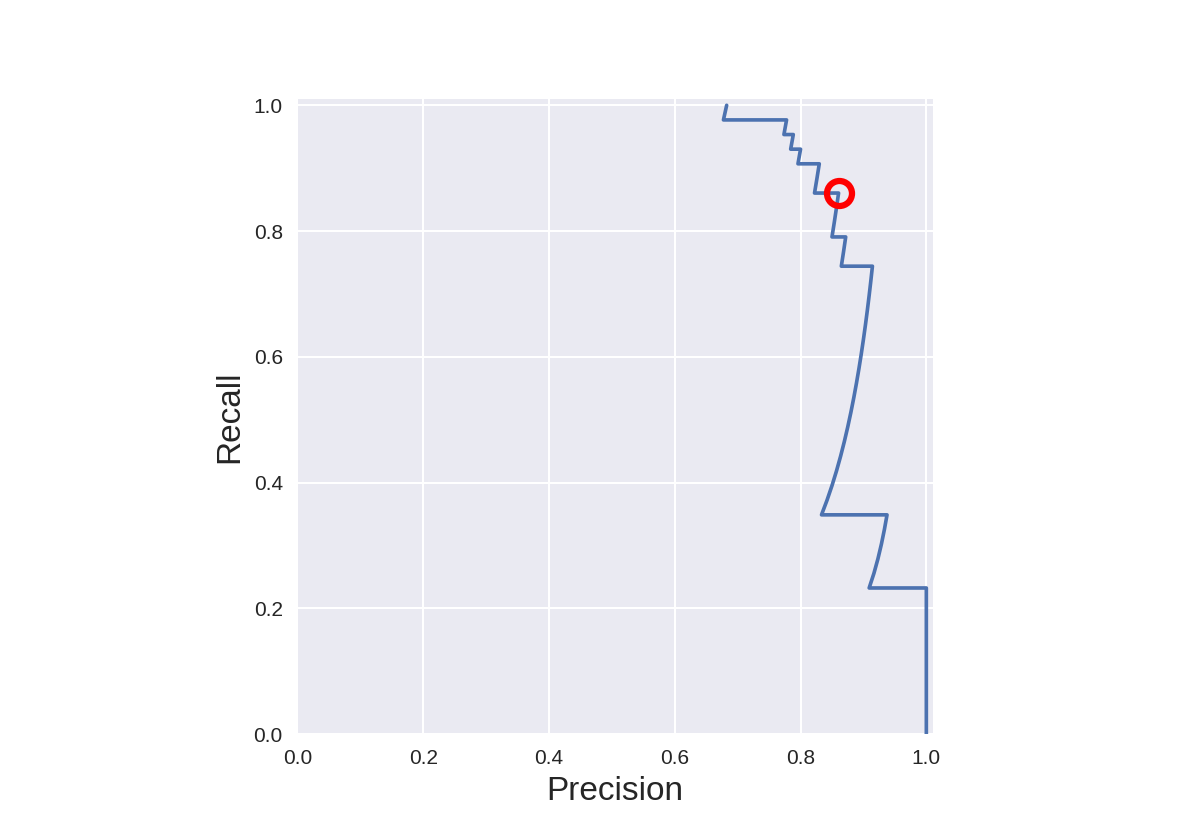

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

<IPython.core.display.Javascript object>


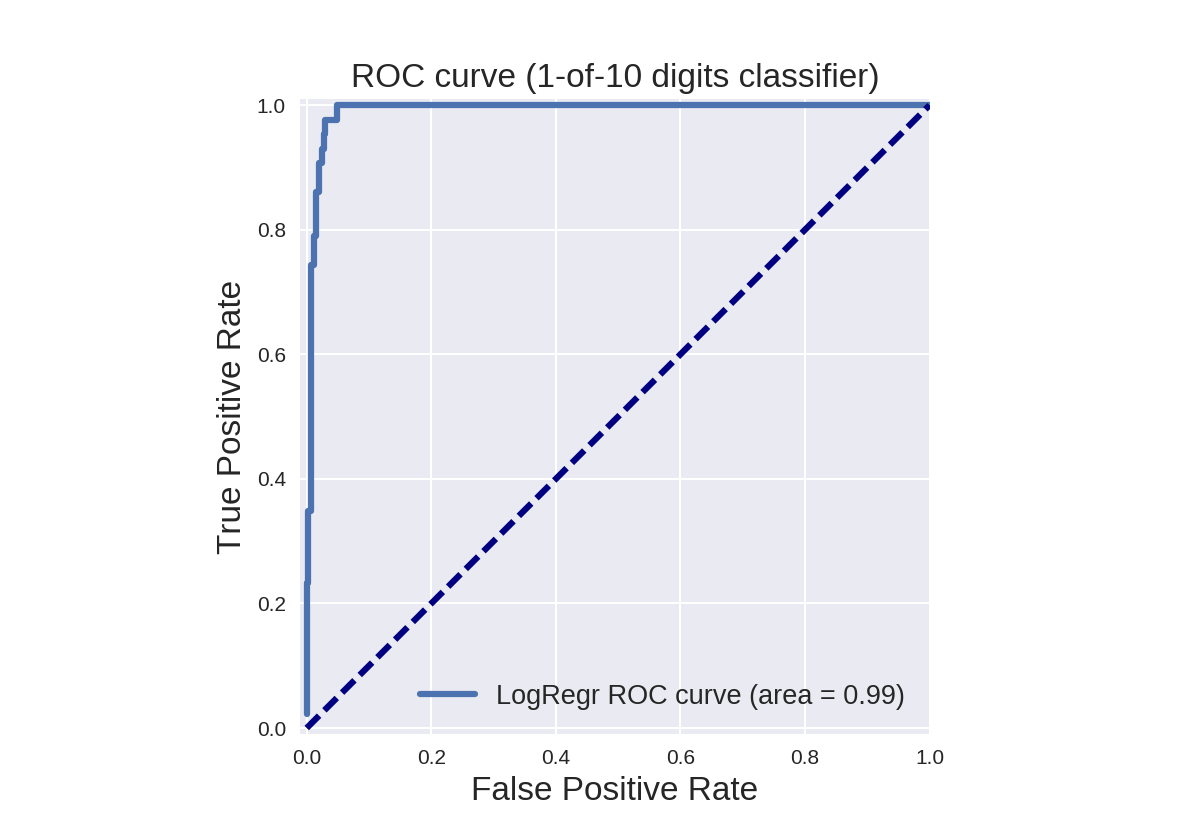

In [25]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


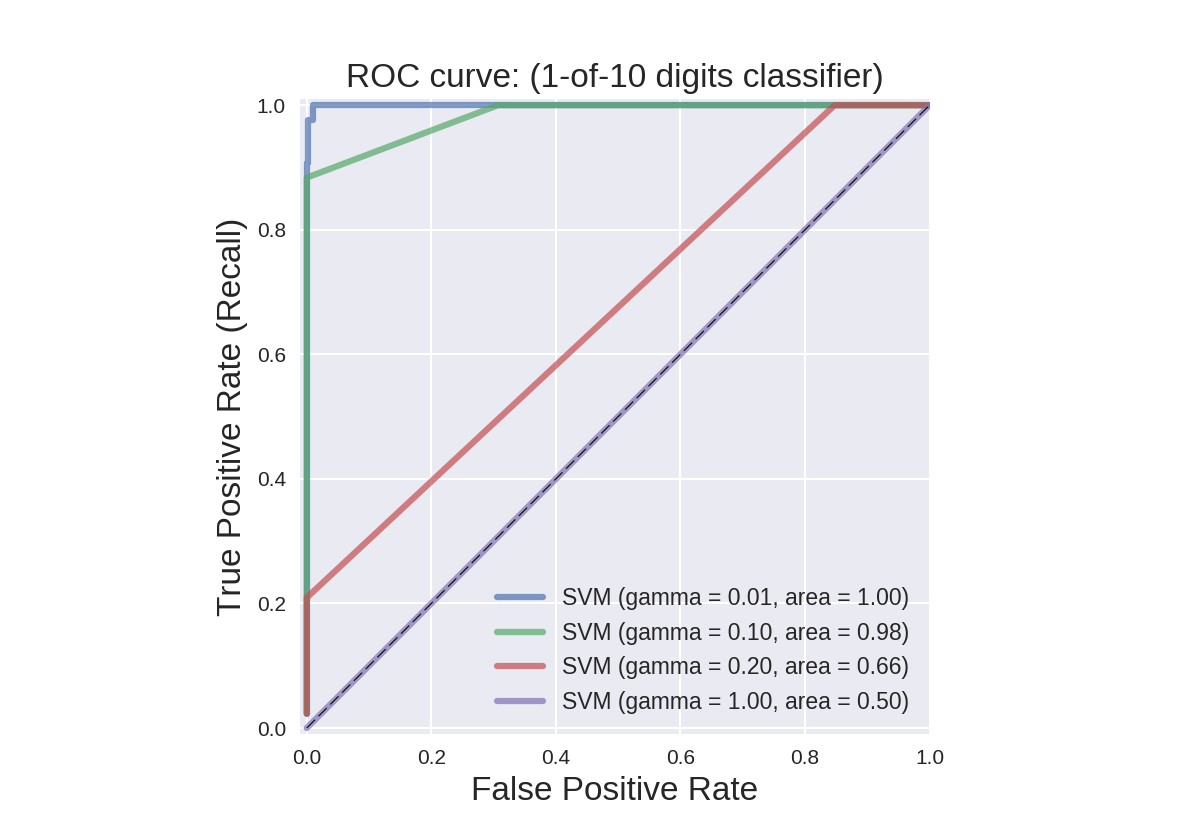

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [26]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

<IPython.core.display.Javascript object>


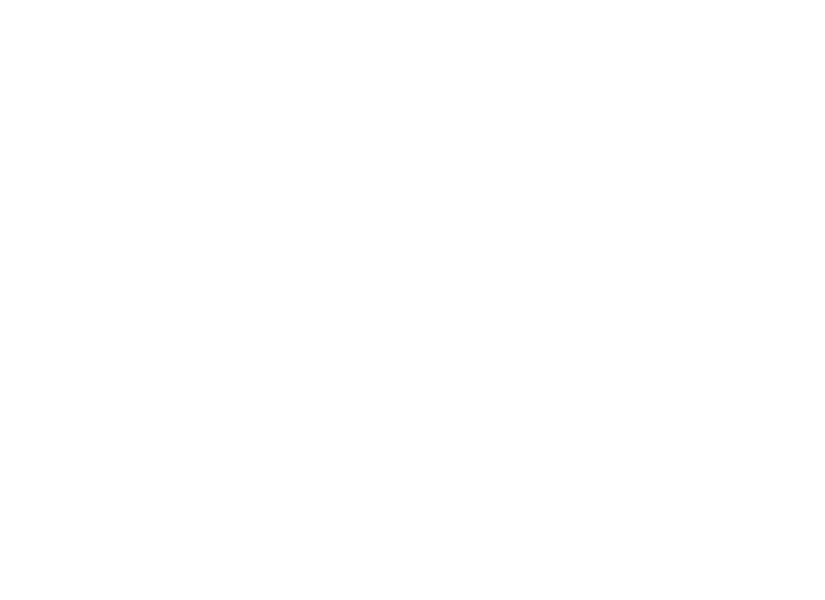

<IPython.core.display.Javascript object>


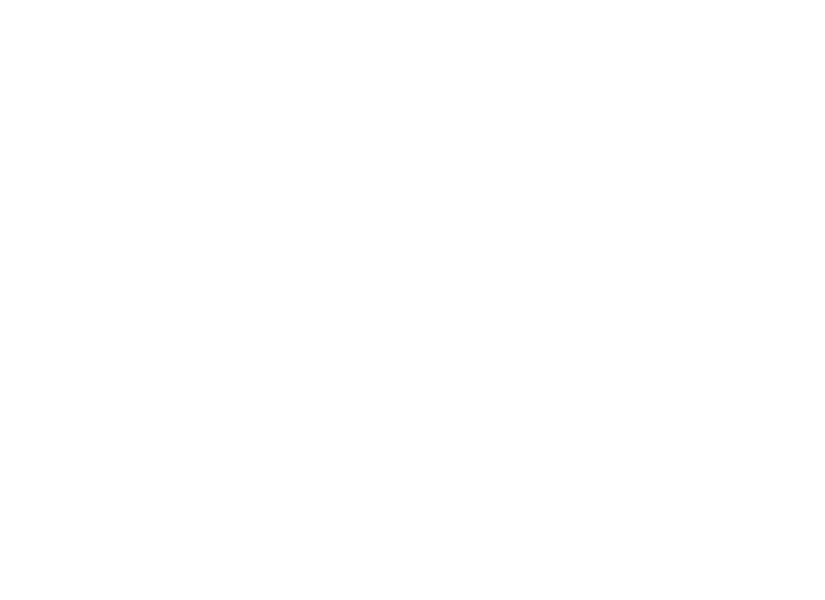

"\nWhile we can see for the accuracy number were about 43% below the confusion matrix that the classifier is doing much worse than the delinear kernel, that single number doesn't give much insight into why. \n\nLooking at the confusion matrix, however, reveals that for every true digit class, a significant fraction of outcomes are to predict the digit four. That's rather surprising. For example, of the 44 instances of the true digit 2 in row 2, 17 are classified correctly, but 27 are classified as the digit 4. Clearly, something is broken with this model and I picked this second example just to show an extreme example of what you might see when things go quite wrong. This digits dataset is well-established and free of problems. But especially when developing with a new dataset, seeing patterns like this in a confusion matrix could give you valuable clues about possible problems, say in the feature pre-processing for example. So as a general rule of thumb as part of model evaluation, I 

In [27]:
'''

In this example which was created using the following notebook code 
based on a support vector classifier with linear kernel, we can see that most of the predictions are correct with only a few misclassifications here and there. 
The most frequent type of mistake here is apparently misclassifying the true digit, eight as a predicted digit one which happened three times. 
And indeed, the overall accuracy is high, about 97% as shown here. As an aside, it's sometimes useful to display a confusion matrix as a heat map in order to highlight the relative frequencies of different types of errors. So, I've included the code to generate that here. For comparison, I've also included a second confusion matrix on the same dataset for another support vector classifier that does much worse in a distinctive way. The only change is to use an RBF, radial basis function kernel instead of a linear kernel. 
'''

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');


'''
While we can see for the accuracy number were about 43% below the confusion matrix that the classifier is doing much worse than the delinear kernel, that single number doesn't give much insight into why. 

Looking at the confusion matrix, however, reveals that for every true digit class, a significant fraction of outcomes are to predict the digit four. That's rather surprising. For example, of the 44 instances of the true digit 2 in row 2, 17 are classified correctly, but 27 are classified as the digit 4. Clearly, something is broken with this model and I picked this second example just to show an extreme example of what you might see when things go quite wrong. This digits dataset is well-established and free of problems. But especially when developing with a new dataset, seeing patterns like this in a confusion matrix could give you valuable clues about possible problems, say in the feature pre-processing for example. So as a general rule of thumb as part of model evaluation, I suggest always looking at the confusion matrix for your classifier. To get some insight into what kind of errors it is making for each class including whether some classes are much more prone to certain kinds of errors than others. 
'''

#### Multi-class classification report

In [28]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



#### Micro- vs. macro-averaged metrics

In [29]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [30]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


### Regression evaluation metrics

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


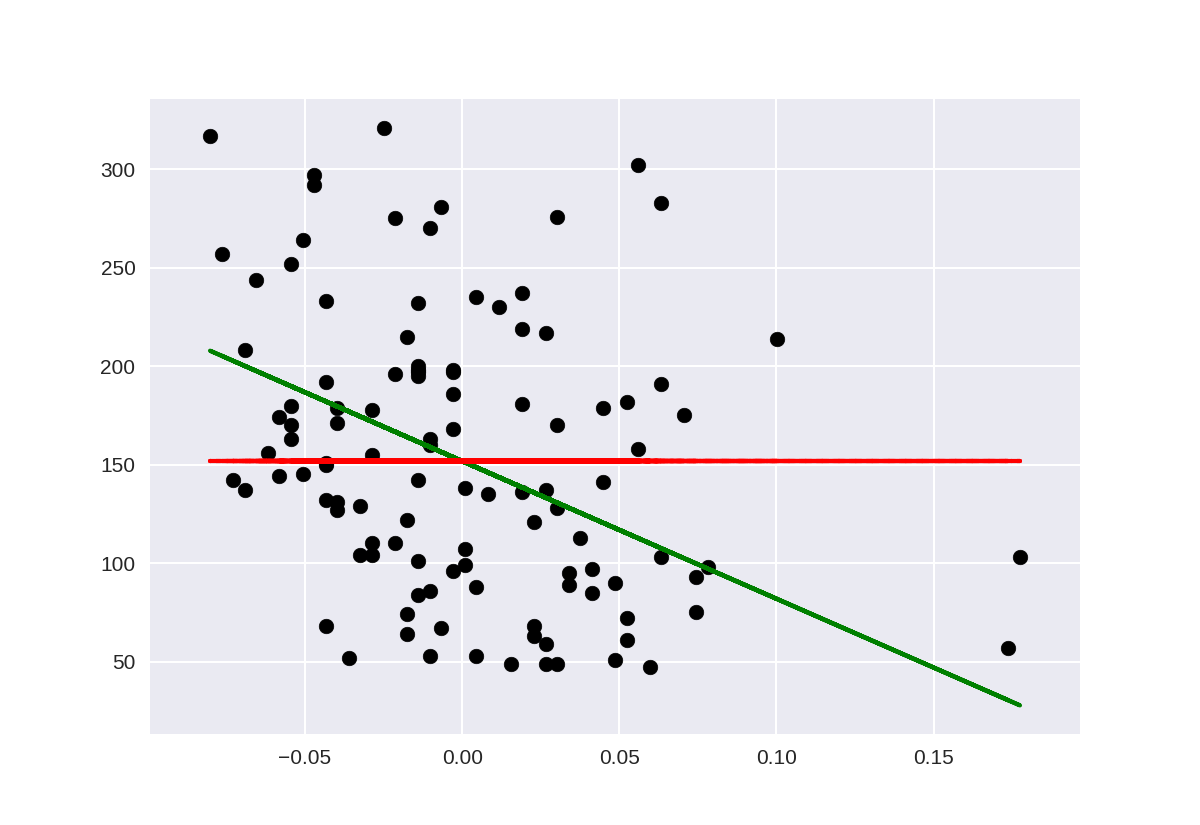

In [31]:
'''
So this is an example of a dummy regressor. 
You can look at the notebook to see that a dummy regressor is created and used just like a regular regression model. You create, fit with the training data, and then call predict on the test data. Although again, like the dummy classifier you should not use the dummy regressor for actual problems. Its only use is to provide a baseline for comparison. 
Looking at the regression metrics output from the linear model compared to the dummy model. We can see that as expected the dummy regressor achieves an r squared score of 0. Since it always makes a constant prediction without looking at the output. 
In this instance the linear model provides only slightly better fit than the dummy regressor, according to both mean squared error and the r2_score. 
'''

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

'''

Aside from the strategy of always predicting the mean of the training target values, you could also create some other flavors of dummy regressors that always predict the median of the training target values, or a particular quantile of those values, or a specific custom constant value that you provide. 
Although regression typically has simpler evaluation needs than classification, it does pay to double check to make sure the evaluation metric you choose for a regression problem does penalize errors in a way that reflects the consequences of those errors for the business, organizational, or user needs of your application. 
'''

### Model selection using evaluation metrics

#### Cross-validation example

In [32]:
'''
In previous lectures we've seen a number of different evaluation frameworks for potential model selection. First, we simply did training and testing on the same dataset, which as we well know, typically overfits badly and doesn't generalize well to new data. As a side note however, it can serve as a useful sanity check to make sure your software engineering and feature generation pipeline is working correctly. Second, we frequently use the single train-test split to produce a single evaluation metric. While fast and easy, this doesn't give as realistic a set of estimates for how well the model may work on future, new data. And we don't get a good picture for the variance in the evaluation metrics that may result as we do prediction on different test sets. Third, we used k-fold cross-validation to create K random train-test splits, where the evaluation metric was averaged across splits. This leads to models that are more reliable on unseen data. In particular, we can also use grid search using for example the GridSearchCV method within each cross-validation fold, to find optimal parameters for a model with respect to the evaluation metric. The default evaluation metric used for a cross-val score or GridSearchCV is accuracy. So how do you apply the new metrics you've learned about here like AUC in model selection? Scikit-learn makes this very easy. You simply add a scoring parameter that's set to the string with the name of the evaluation metric you want to use.

Let's first look at an example using the scoring parameter for cross-validation, and then we'll take a look at the other primary method of model selection, grid search. In the notebook here we have a cross-validation example where we're running five folds using a support vector classifier with a linear kernel and C parameter set to one. The first call to cross-val score just uses default accuracy as the evaluation metric. The second call uses the scoring parameter using the string 'roc_auc', and this will use AUC as the evaluation metric. The third call sets the scoring parameter to 'recall', to use that as the evaluation metric. You can see the resulting list of five evaluation values, one per fold for each metric. Now, here we're not doing any parameter tuning we're simply evaluating our model's average performance across multiple folds.

'''


from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))



Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


#### Grid search example

In [33]:
'''
Now, in this grid search example we use a support vector classifier that uses a radio basis function kernel. And the critical parameter here is the gamma parameter that intuitively sets the radius or width of influence of the kernel. We use GridSearchCV to find the value of gamma that optimizes a given evaluation metric in two cases. In the first case, we just optimize for average accuracy; in the second case we optimize for AUC. In this particular case the optimal value of gamma happens to be the same, point zero-zero-one, for both evaluation metrics. As we'll see later in other cases, the optimal parameter value can be quite different depending on the evaluation metric used to optimize. 

'''
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513
Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


#### Evaluation metrics supported for model selection

In [37]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

<IPython.core.display.Javascript object>


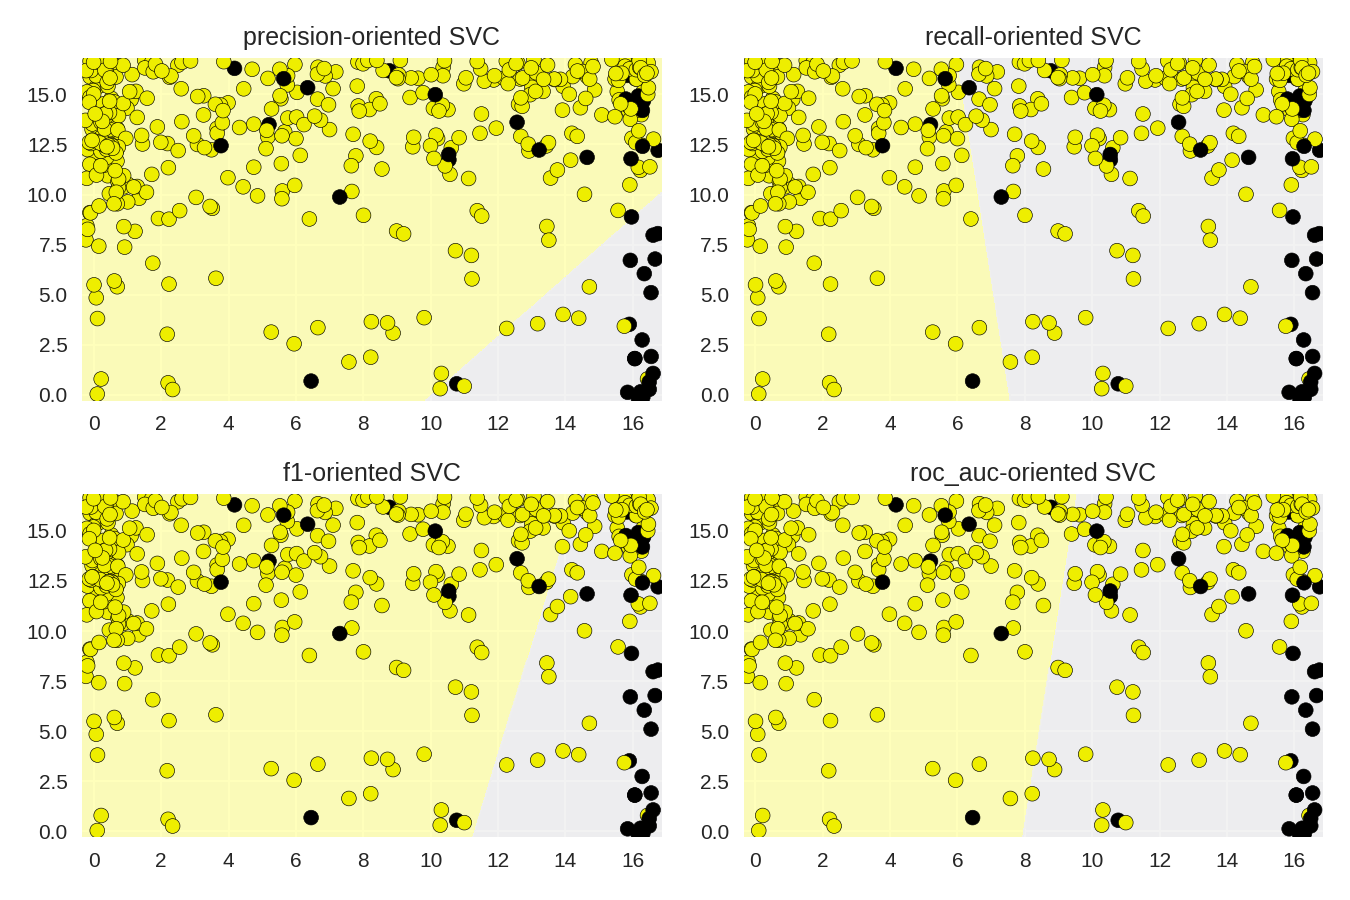

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5356034553868821
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9284310837047003
Grid best parameter (max. f1): {'class_weight': {1: 4}}
Grid best score (f1): 0.499939260734073
Grid best parameter (max. roc_auc): {'class_weight': {1: 20}}
Grid best score (roc_auc): 0.8903616906971209


In [35]:
'''
You can see the complete list of names for the evaluation metric supported by the scoring parameter by running the following code that uses the score's variable imported from sklearn metrics. You can see metrics for classification such as the string 'precision_ micro' that represents micro-averaged precision as well as metrics for regression such as the R2 metric for R-squared regression loss. Let's take a look at a specific example that shows how a classifier's decision boundary changes when it's optimized for different evaluation metrics. This classification problem is based on the same binary digit classifier training and test sets we've been using as an example throughout the notebook. In these classification visualization examples, the positive examples, the digit one are shown as black points and the region of positive class prediction is shown in the light-colored or yellow region to the right of this decision boundary. The negative examples, all other digits, are shown as white points. And the region of negative class prediction here in these figures is to the left of the decision boundary. The data points have been plotted using two out of the 64 future values in the digits' dataset and have been jittered a little. That is, I've added a little bit of random noise so we can see more easily the density of examples in the feature space.

'''

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


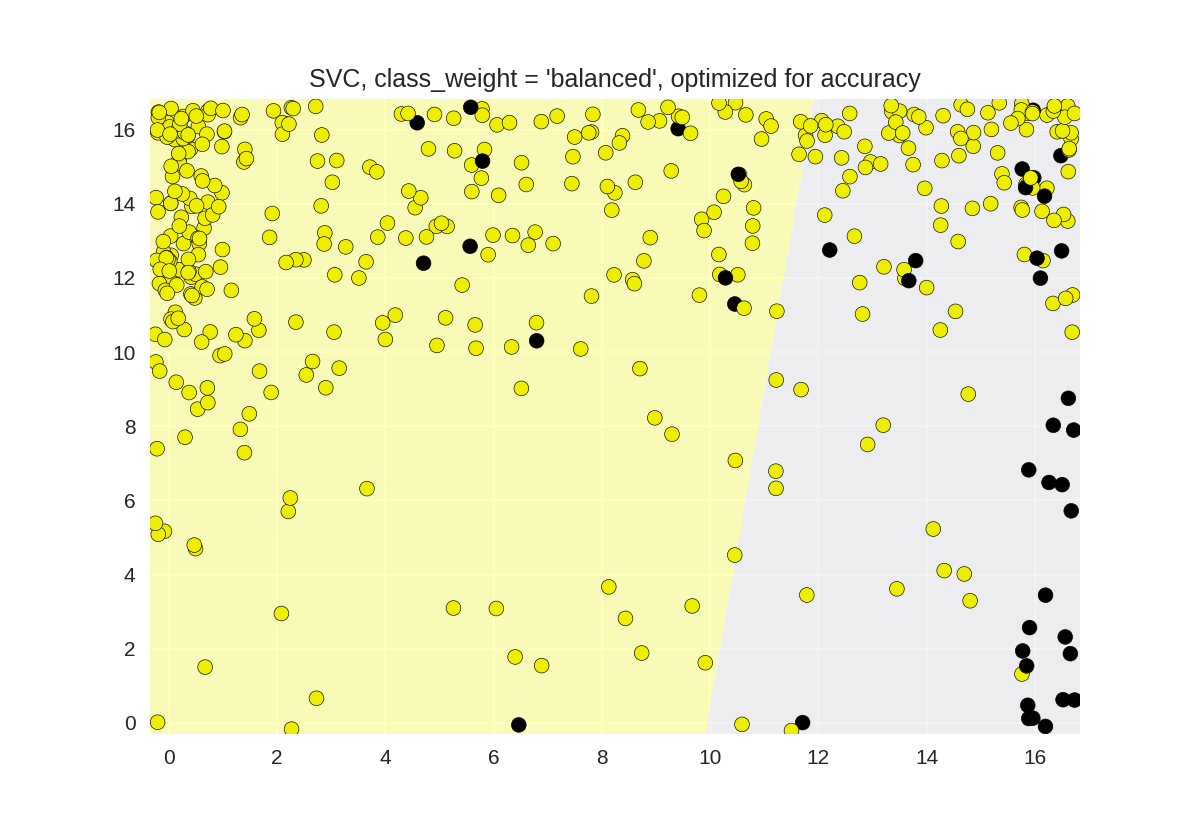

<IPython.core.display.Javascript object>


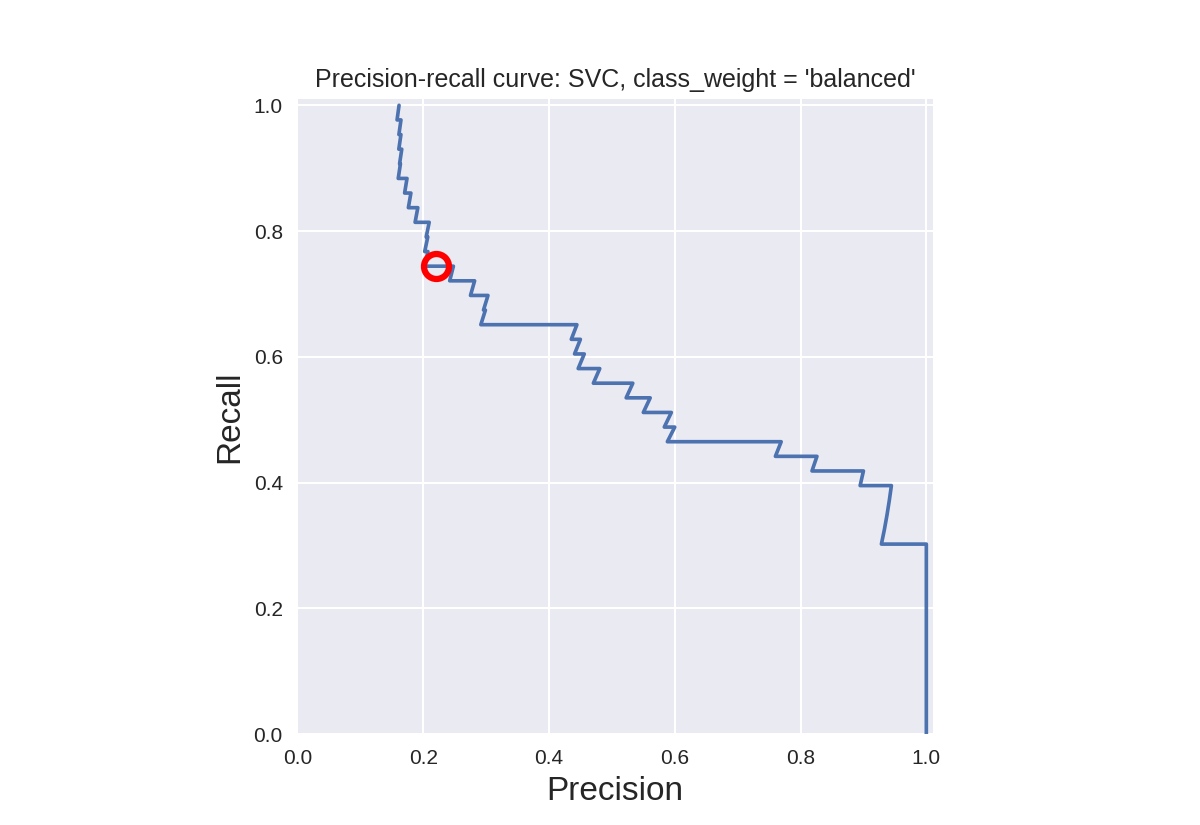

At zero threshold, precision: 0.22, recall: 0.74


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))